# Exploratory Data Analysis For Housing Prices Dataset | 18/05/2023
___

## First Look

In [1]:
import pandas as pd
import numpy as np

#import graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the raw_data
from pathlib import Path
project_path = Path(__name__).resolve().parents[1]
fp_raw_data = project_path.joinpath('data/raw/housing/housing.csv')
raw_data = pd.read_csv(fp_raw_data)

In [3]:
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
raw_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
raw_data.ocean_proximity.value_counts()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

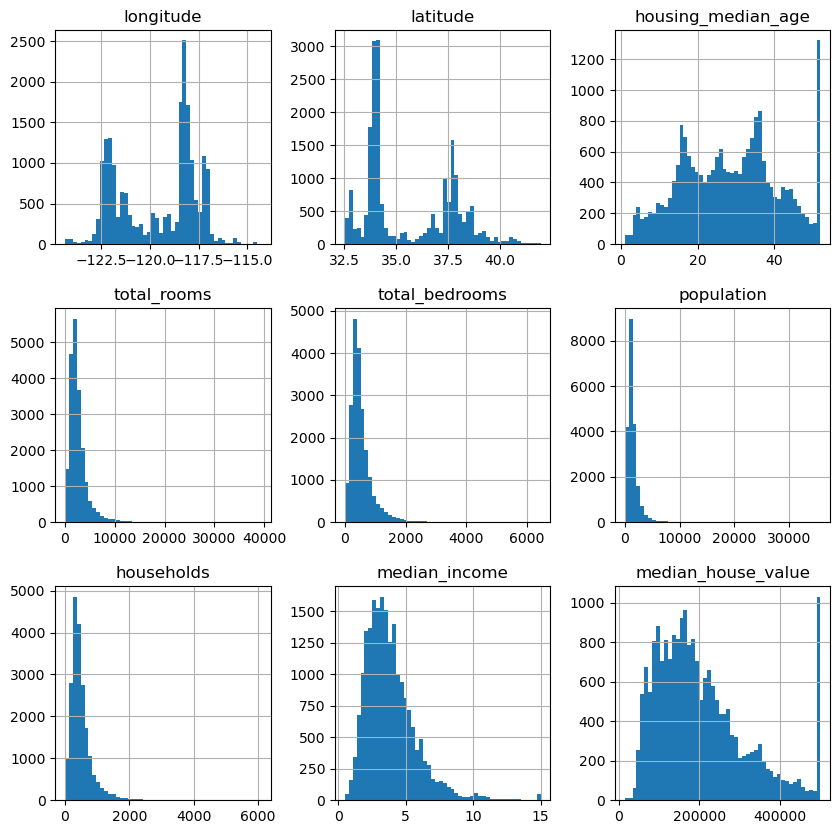

In [6]:
raw_data.hist(bins=50, figsize=(10,10))

Insights:
* Median income was scaled and roughly equivalent of 1/10.000 of the real value.
* Median value ise also capped with $500k value. -> Might be a problem since  it's the target column of prediction.
    * Either collect labels of the houses with prices higher than the cap or remove them from the train dataset.
* Patterns are mostly skewed right. -> Should be transformed.  

# Split the data
___

In [ ]:
#TODO fix this

# call split file and observe the results afterwards
import src.data.split_train_test

In [14]:
X_train = pd.read_csv('../data/interim/X_train.csv', index_col='Unnamed: 0')
y_train = pd.read_csv('../data/interim/y_train.csv', index_col='Unnamed: 0')

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 19370 to 9733
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16345 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### Experiment between attributes

<Axes: xlabel='longitude', ylabel='latitude'>

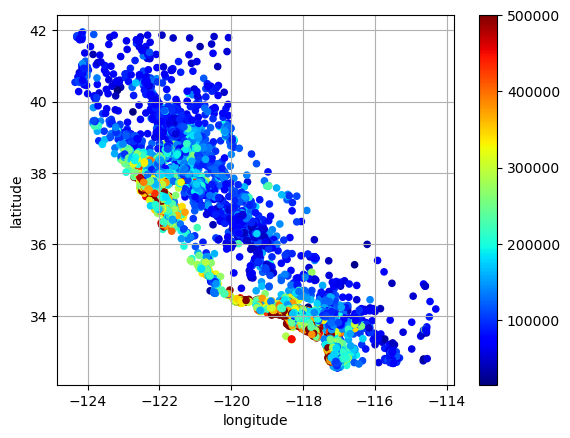

In [16]:
X_train.plot(kind='scatter', grid=True, colormap='jet', colorbar=True, sharex=False, legend=True,
             x='longitude', y='latitude', 
             c=y_train.median_house_value)

<Axes: xlabel='longitude', ylabel='latitude'>

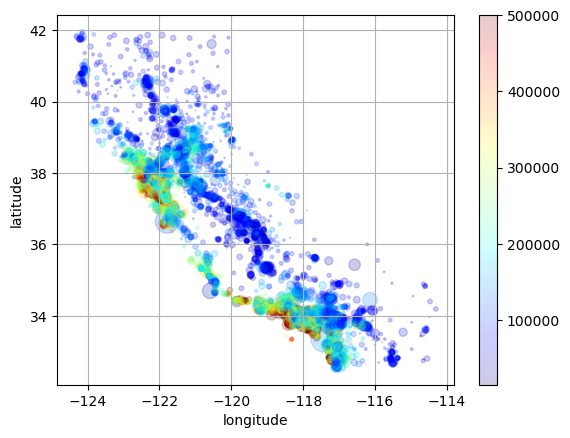

In [17]:
X_train.plot(kind='scatter', grid=True, colormap='jet', colorbar=True, sharex=False, legend=True, alpha=0.2,
             x='longitude', y='latitude', s=X_train.population/100,
             c=y_train.median_house_value)

Seemingly train data is not focused on a single area, mostly related with the location & population

In [19]:
corr_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64','float64']]

In [20]:
corr_matrix = pd.concat([X_train[corr_columns], y_train],axis=1).corr()

<Axes: >

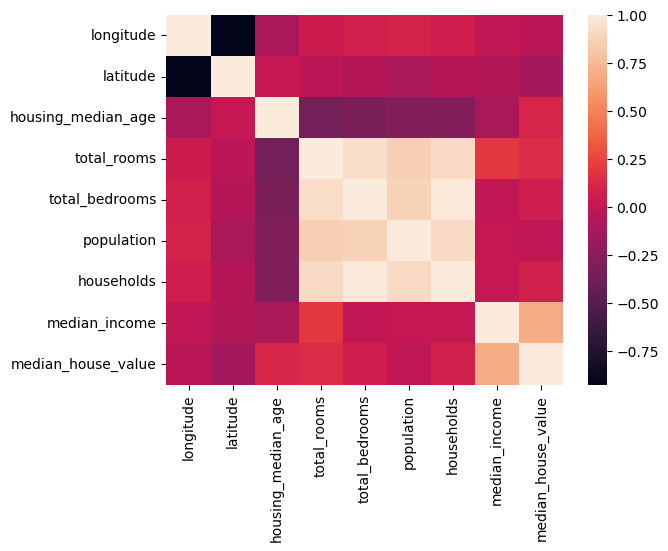

In [21]:
sns.heatmap( corr_matrix )

In [24]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690047
total_rooms           0.139320
housing_median_age    0.107589
households            0.070065
total_bedrooms        0.052883
population           -0.020588
longitude            -0.043439
latitude             -0.146360
Name: median_house_value, dtype: float64

In [33]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

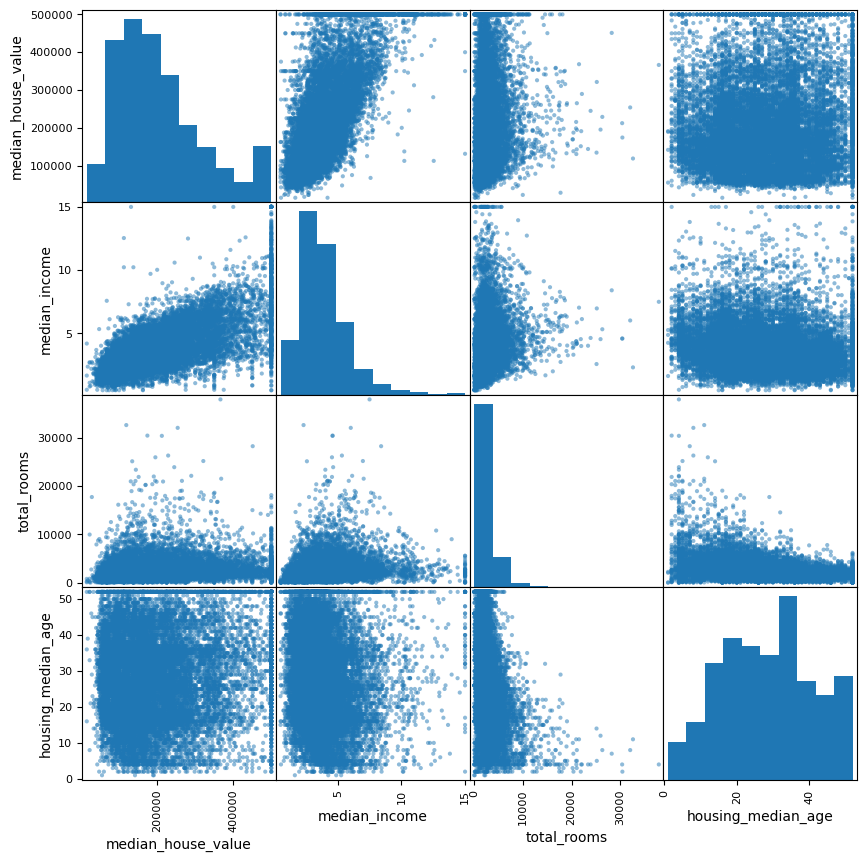

In [36]:
plt = pd.plotting.scatter_matrix(pd.concat([X_train, y_train], axis=1)[attributes], figsize=(10,10))

In [37]:
df = pd.concat([X_train, y_train], axis=1)

<Axes: xlabel='median_income', ylabel='median_house_value'>

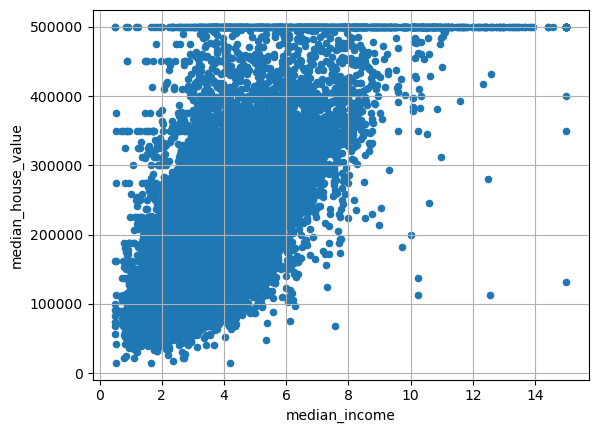

In [39]:
df.plot(kind='scatter', x='median_income', y='median_house_value', grid=True)

In [44]:
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["people_per_house"] = df["population"] / df["households"]

In [45]:
df.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690047
rooms_per_house       0.177089
total_rooms           0.139320
housing_median_age    0.107589
households            0.070065
total_bedrooms        0.052883
population           -0.020588
people_per_house     -0.024845
longitude            -0.043439
latitude             -0.146360
bedrooms_ratio       -0.259403
Name: median_house_value, dtype: float64

In [ ]:
X_train['income_cat'] = pd.cut( X_train.median_income, bins=[0,1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])

In [ ]:
X_train.income_cat.value_counts().sort_index().plot.bar(grid=True)
plt.xlabel('Income Category'); plt.ylabel('Number of districts')

## Delete Down

In [378]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [379]:
df = pd.read_csv( project_path.joinpath('data/raw/housing/housing.csv'))


In [380]:
numeric_cols = train.select_dtypes(include=[np.number]).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    #('scaler', MinMaxScaler(feature_range=(-1,1)))
    ('scaler', StandarScaler(feature_range=(-1,1)))

])

NameError: name 'StandarScaler' is not defined

In [381]:
categoric_cols = train.select_dtypes(include=['object']).columns
categoric_transformer = Pipeline(steps=[
    #('ordinal', OrdinalEncoder()),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [382]:
preprocessor =  ColumnTransformer( transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categoric_transformer, categoric_cols)
    ])

In [383]:
#model = RandomForestRegressor(n_estimators=100, random_state=0)
model = LinearRegression()

In [384]:
pipe = Pipeline( steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [385]:
pipe.fit(train, train_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler(feature_range=(-1,
                                                                                               1)))]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['ocean_proximity'], dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
valid_labels = valid['median_house_value'].copy()
valid = valid.drop('median_house_value', axis=1)

In [388]:
pipe.score(valid, valid_labels)

0.6393300819889421

In [389]:
predictions = pipe.predict(valid)
predictions = pd.DataFrame( predictions, index=valid.index )
final = pd.concat([predictions, valid_labels, valid[['latitude','longitude']]], axis=1 )
final.columns = ['predicted', 'real', 'lat', 'lon']
final['error'] = final.real-final.predicted

In [390]:
final.head()

,predicted,real,lat,lon,error
2124,85464.236389,103600.0,38.92,-120.00,18135.763611
18883,71620.620203,93800.0,33.65,-116.90,22179.379797
11665,330499.526724,349000.0,37.75,-122.45,18500.473276
20190,418940.803225,500001.0,37.21,-121.87,81060.196775
19991,204449.299832,243800.0,36.61,-121.92,39350.700168


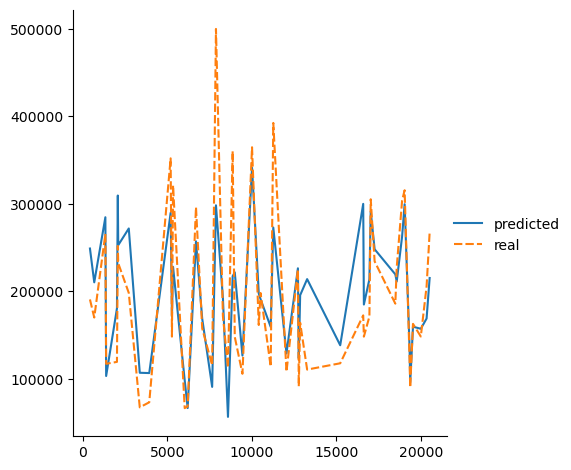

In [391]:
sns.relplot(kind='line', data=final.iloc[100:150, 0:2] )

<Axes: xlabel='lat', ylabel='lon'>

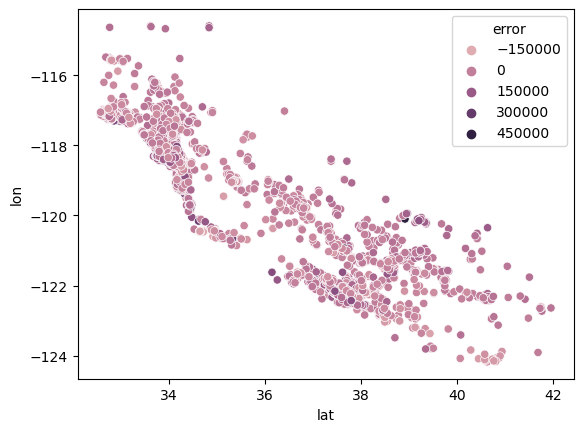

In [392]:
sns.scatterplot(data=final, x='lat', y='lon', hue=final.error )